# Data Import

In [60]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns

In [61]:
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [62]:
df = load_diabetes(return_X_y=False, as_frame=True,scaled=False).frame

In [63]:
df.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
325,48.0,1.0,31.4,75.33,242.0,151.6,38.0,6.37,5.5683,103.0,192.0
128,34.0,1.0,20.6,87.00,185.0,112.2,58.0,3.00,4.3041,74.0,115.0
166,33.0,2.0,20.8,84.00,125.0,70.2,46.0,3.00,3.7842,66.0,70.0
130,31.0,2.0,35.3,125.00,187.0,112.4,48.0,4.00,4.8903,109.0,274.0
31,42.0,1.0,20.3,71.00,161.0,81.2,66.0,2.00,4.2341,81.0,59.0
123,50.0,2.0,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
107,56.0,1.0,31.0,78.67,187.0,141.4,34.0,5.50,4.0604,90.0,144.0
64,67.0,2.0,24.0,83.00,143.0,77.2,49.0,3.00,4.4308,94.0,71.0
204,79.0,2.0,27.0,103.00,169.0,110.8,37.0,5.00,4.6634,110.0,277.0
55,37.0,1.0,21.8,84.00,184.0,101.0,73.0,3.00,3.9120,93.0,128.0


# Data Cleaning and transforming

### Check schema and datatypes

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [65]:
# mark continuous columns

cast_to_int = ['age','s1','s3','s6','target']
   
df[cast_to_int] = df[cast_to_int].astype(int)

In [66]:
# mark categorical columns

cast_to_bool = ['sex']
df[cast_to_bool] = (df[cast_to_bool] != 1).astype(int)

In [67]:
df.sex.unique()

array([1, 0])

### Check null values

In [68]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

# Data Exploration

In [69]:
df.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,48.52,0.47,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26,152.13
std,13.11,0.50,4.42,13.83,34.61,30.41,12.93,1.29,0.52,11.50,77.09
min,19.00,0.00,18.00,62.00,97.00,41.60,22.00,2.00,3.26,58.00,25.00
25%,38.25,0.00,23.20,84.00,164.25,96.05,40.25,3.00,4.28,83.25,87.00
50%,50.00,0.00,25.70,93.00,186.00,113.00,48.00,4.00,4.62,91.00,140.50
75%,59.00,1.00,29.28,105.00,209.75,134.50,57.75,5.00,5.00,98.00,211.50
max,79.00,1.00,42.20,133.00,301.00,242.40,99.00,9.09,6.11,124.00,346.00


## Features visualisation

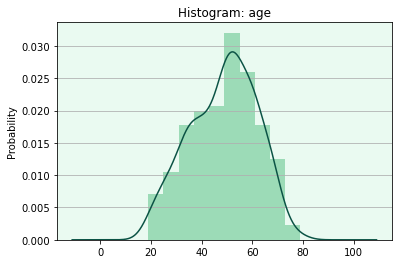

In [70]:
import matplotlib.pyplot as plt

def show_histogram(df,column_name):
    fig, ax = plt.subplots()
    df[column_name].plot.kde(ax=ax, legend=False, title='Histogram: {}'.format(column_name), color='#0B5345')
    df[column_name].plot.hist(density=True, ax=ax, alpha=0.4, color = '#27AE60')
    ax.set_ylabel('Probability')
    ax.grid(axis='y')
    ax.set_facecolor('#EAFAF1')
    plt.show()
    
show_histogram(df,'age')

[Text(0, 0, 'male'), Text(1, 0, 'female')]

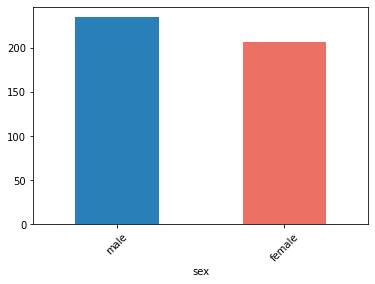

In [71]:
fig,ax = plt.subplots(figsize=(6,4))
ax = df.groupby('sex')['sex'].count().plot.bar(x={0:'male',1:'female'},color=['#2980B9','#EC7063'])
ax.set_xticklabels(['male','female'], rotation=45)

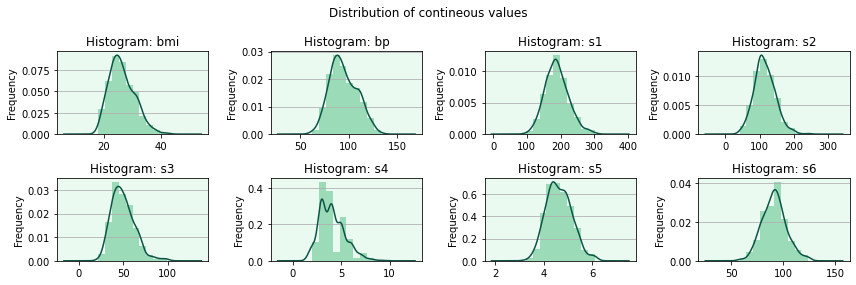

In [72]:
nrow=2
ncol=4
cols = ['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
fig, axs = plt.subplots(nrow,ncol, figsize=(12,4), sharey=False)
fig.suptitle('Distribution of contineous values')
for i in range(nrow):
    for j in range(ncol):
        col = cols.pop(0)
        ax = df[col].plot.kde(ax=axs[i,j], legend=False, title='Histogram: {}'.format(col), color='#0B5345')
        ax = df[col].plot.hist(density=True, ax=axs[i,j], alpha=0.4, color = '#27AE60')
        axs[i,j].set_facecolor('#EAFAF1')
        axs[i,j].grid(axis='y')
plt.tight_layout()

In [73]:
from sklearn.preprocessing import StandardScaler

cols = ['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

sscaler = StandardScaler()
scaled_continuous_features = sscaler.fit_transform(df[cols].copy())
scaled_continuous_features = pd.DataFrame(scaled_continuous_features,columns = cols)
scaled_continuous_features

,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.297088,0.459841,-0.929746,-0.732065,-0.912316,-0.054499,0.418531,-0.370989
1,-1.082180,-0.553505,-0.177624,-0.402886,1.564421,-0.830301,-1.436589,-1.938479
2,0.934533,-0.119214,-0.958674,-0.718897,-0.680122,-0.054499,0.060156,-0.545154
3,-0.243771,-0.770650,0.256292,0.525397,-0.757520,0.721302,0.476983,-0.196823
4,-0.764944,0.459841,0.082726,0.327890,0.171256,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...
437,0.413360,1.256040,-0.119769,-0.053957,-0.602724,-0.054499,0.655787,0.151508
438,-0.334410,-1.422086,1.037341,1.664355,-0.602724,0.721302,-0.380819,0.935254
439,-0.334410,0.363573,-0.785107,-0.290965,-0.525326,-0.232934,-0.985649,0.325674
440,0.821235,0.025550,0.343075,0.321306,-0.602724,0.558384,0.936163,-0.545154


## Outliers detection

In [74]:
df[cols].describe()

,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,26.375792,94.647014,189.140271,115.439140,49.787330,4.070249,4.641411,91.260181
std,4.418122,13.831283,34.608052,30.413081,12.934863,1.290450,0.522391,11.496335
min,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


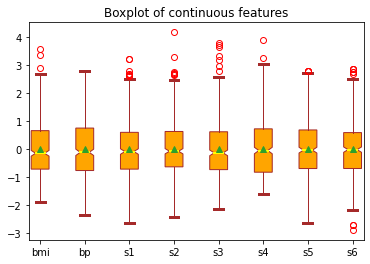

In [75]:
import numpy as np

positions = np.arange(start=4,stop=len(cols)*2+4,step=2)

fig, ax = plt.subplots() #figsize=(8,6)


ax.boxplot(scaled_continuous_features
          ,positions=positions
            ,widths=0.8
           ,notch=True #replaces recangular shape with notches, that represent the confidence interval(CI) around the median
           
           # setting boxplot colors
           ,patch_artist=True  #To colorize the boxplot, you need to first use the patch_artist=True keyword to tell it that the boxes are patches and not just paths.
           ,boxprops=dict(facecolor="orange", color='brown', linewidth=1, edgecolor='white') # then when patch_artist set to True, you can change properties of boxes 
           ,capprops=dict(color="brown", linewidth=3)
            ,whiskerprops=dict(color="brown")
            ,flierprops=dict(color="green", markeredgecolor="red")
            ,medianprops=dict(color="yellow", linewidth=2)
           
           ,showmeans= True # shows mean values as small triangle
           ,showfliers = True # shows outliers (rings)
          )

ax.set(title='Boxplot of continuous features'  # instead of setting ax.set_title and others set values
       ,autoscale_on=True
       ,frame_on= True)
ax.set_xticks(positions, cols)
plt.show();

## Features correlation

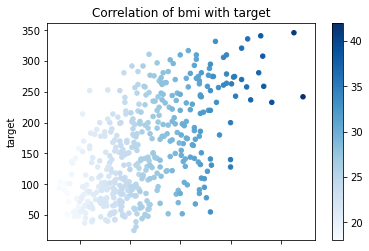

In [76]:
import matplotlib.cm as cm

df[['bmi','target']].plot(x='bmi',y='target'
                          , kind='scatter', c=df['bmi'].astype(int),cmap='Blues'
                         ,title = 'Correlation of bmi with target')
plt.show()

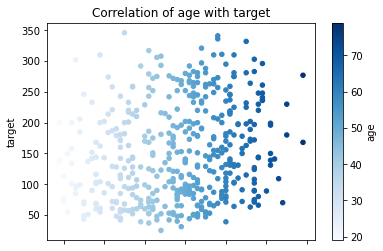

In [77]:
df[['age','target']].plot(x='age',y='target'
                          , kind='scatter', c='age',cmap='Blues'
                         ,title = 'Correlation of age with target')
plt.show()

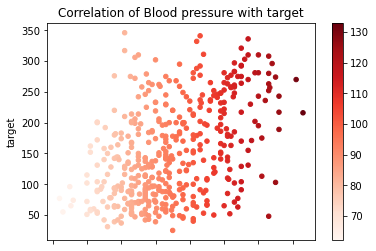

In [78]:
df[['bp','target']].plot(x='bp',y='target'
                          , kind='scatter', c=df['bp'].astype(int),cmap='Reds'
                         ,title = 'Correlation of Blood pressure with target')
plt.show()

[Text(0, 0, 'male'), Text(1, 0, 'female')]

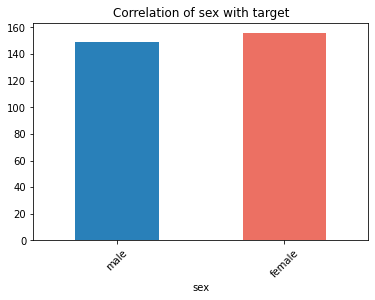

In [79]:
ax = df[['sex','target']].groupby('sex').mean().reset_index().plot(kind='bar'
                                                              , x='sex'
                                                              , y='target'
                                                              ,color=['#2980B9','#EC7063']
                                                              ,title = 'Correlation of sex with target'
                                                              ,legend = False     
                                                             )
# ax.set_xticks(['a','b'])
ax.set_xticklabels(['male','female'], rotation=45)

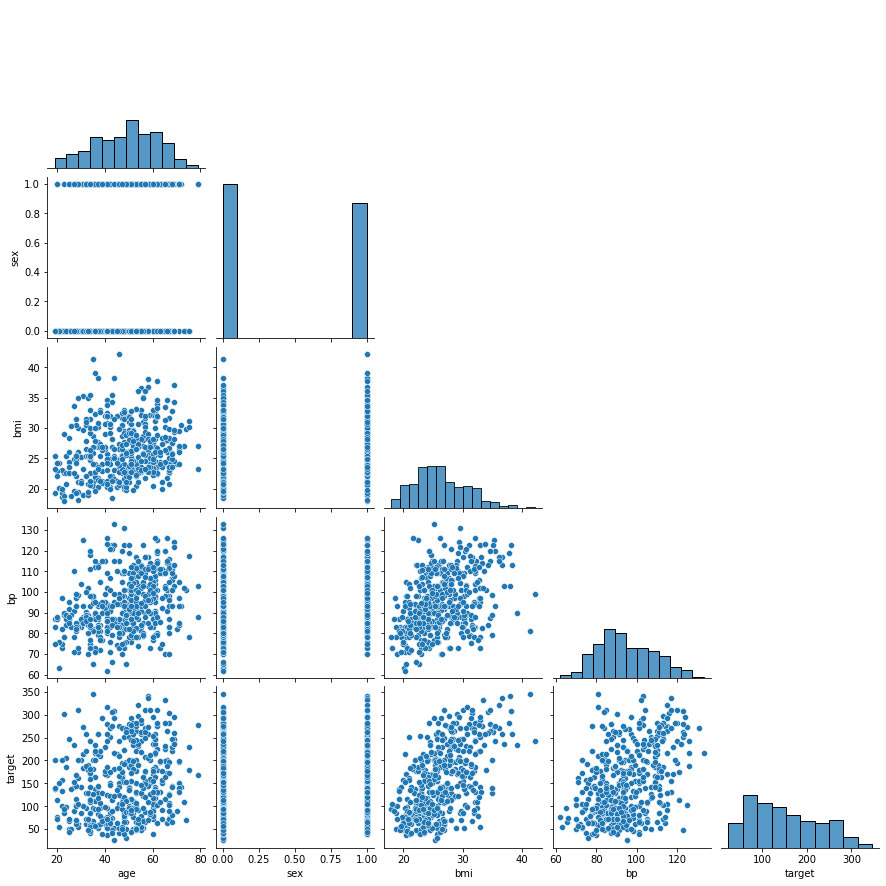

In [80]:
sns.pairplot(df, vars=['age','sex','bmi','bp','target'],corner=True) #hue='target',

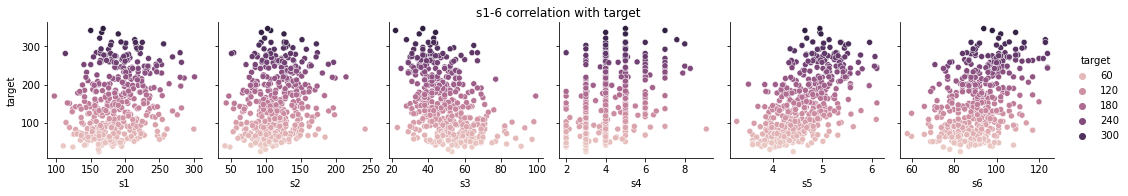

In [81]:
g = sns.pairplot(df, x_vars=['s1','s2','s3','s4','s5','s6']
             ,y_vars='target'
            ,hue='target'
            )
plt.suptitle("s1-6 correlation with target", y=1.05)
plt.show()

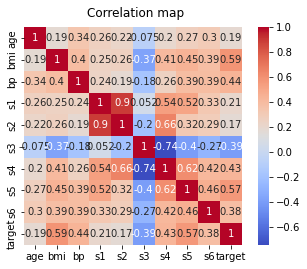

In [82]:
sns.heatmap(df.drop(columns='sex').corr()
            , annot=True
           ,square=True
           ,cmap='coolwarm'
           )
plt.suptitle("Correlation map", y=0.95)
plt.show()

# Feature Selection

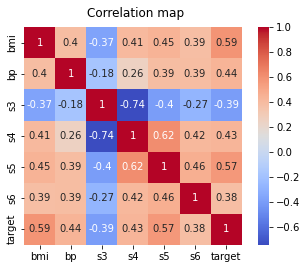

In [83]:
# age, s1, s2 and s2 has vary weak correlation with our target
# let's exclude them and see new correlation map

sns.heatmap(df.drop(columns=['sex','age', 's1', 's2','s2']).corr()
            , annot=True
           ,square=True
           ,cmap='coolwarm'
           )
plt.suptitle("Correlation map", y=0.95)
plt.show()

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
two_d = pca.fit_transform(StandardScaler().fit_transform(df[['sex', 'bmi', 'bp', 's3', 's4', 's5', 's6']]))
two_d.shape

(442, 2)

In [85]:
pca.explained_variance_ratio_.cumsum(), pca.explained_variance_

(array([0.46094014, 0.61797537]), array([3.23389748, 1.10173922]))

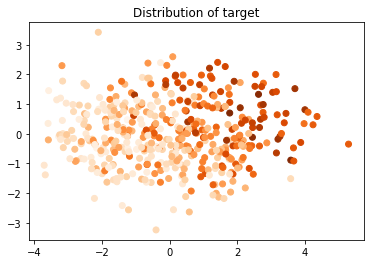

In [86]:
plt.scatter(x=two_d[:,0],y=two_d[:,1], c=df[['target']].values.flatten().astype(int),cmap='Oranges')
plt.title("Distribution of target")
plt.show()

# Baseline model training

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [88]:
X = df[['sex', 'bmi', 'bp', 's3', 's4', 's5', 's6']]
y = df[['target']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
models = []
models.append(('EN',Pipeline([("scaler",StandardScaler()),("Elastic_Net",ElasticNet())])))
models.append(('RF_Reg',RandomForestRegressor()))
models.append(('Xgb_reg',xgb.XGBRegressor()))
models

[('EN',
  Pipeline(steps=[('scaler', StandardScaler()), ('Elastic_Net', ElasticNet())])),
 ('RF_Reg', RandomForestRegressor()),
 ('Xgb_reg',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, random_state=None,
               reg_alpha=None, reg_lambda=None, ...))]

In [91]:
scores = {}
for name,model in models:
    model.fit(X_train,y_train)
    scores[name] = r2_score(y_test,model.predict(X_test))

C:\Users\skmbo\AppData\Local\Temp\ipykernel_4512\898141727.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


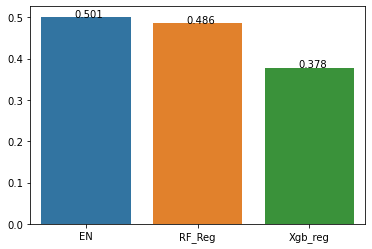

In [92]:
x_bar = list(scores.keys())
y_bar = list(scores.values())
sns.barplot(x=x_bar,y=y_bar) #, width=0.5

for i in range(len(x_bar)):
    plt.text(i-0.1,y_bar[i],round(y_bar[i],3))

In [94]:
X_scaled = sscaler.fit_transform(X)
X_scaled[:4]

array([[ 1.06548848,  1.29708846,  0.45984057, -0.91231636, -0.05449919,
         0.41853093, -0.37098854],
       [-0.93853666, -1.08218016, -0.55350458,  1.56442119, -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.06548848,  0.93453324, -0.1192138 , -0.68012222, -0.05449919,
         0.06015558, -0.54515416],
       [-0.93853666, -0.24377122, -0.77064997, -0.75752027,  0.72130245,
         0.47698252, -0.19682291]])

In [96]:
# Cross validation score
from sklearn.metrics import make_scorer
cv_scores = {}
for name,model in models:
    score = cross_val_score(model,X_scaled,y.values.flatten(),cv=5, scoring = make_scorer(r2_score))
    cv_scores[name] = np.mean(score)

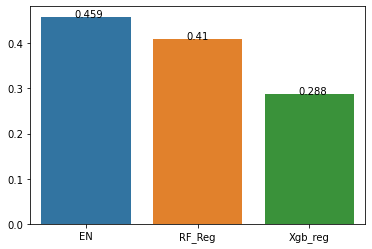

In [100]:
x_bar = list(cv_scores.keys())
y_bar = list(cv_scores.values())

sns.barplot(data=None,x=x_bar,y=y_bar) #, width=0.5
for i in range(len(x_bar)):
    plt.text(i-0.1,y_bar[i],round(y_bar[i],3))

## Pipeline with Gridsearch

In [101]:
params = {"Elastic_Net__alpha":[0.01,0.3,1,1.5,2],"Elastic_Net__l1_ratio":[0.1,0.3,0.5,0.7,0.9]}

In [102]:
EN_pipe = models[0][1]
EN_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('Elastic_Net', ElasticNet())])

In [103]:
grid = GridSearchCV(EN_pipe,params)
grid

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Elastic_Net', ElasticNet())]),
             param_grid={'Elastic_Net__alpha': [0.01, 0.3, 1, 1.5, 2],
                         'Elastic_Net__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [104]:
grid.fit(X_train,y_train)
grid.best_params_

{'Elastic_Net__alpha': 1, 'Elastic_Net__l1_ratio': 0.9}

## Model evaluation and Error analysis

In [254]:
r2_score(y_test,grid.predict(X_test))

0.5105152987272126

# Fine Tuning

In [105]:
elastic_net = Pipeline([('scaler',StandardScaler()),('en',ElasticNet(alpha=1,l1_ratio=0.9))])
rf = RandomForestRegressor()
ensembler = VotingRegressor(estimators = [('en',elastic_net),('rf',rf)])
params = {"rf__max_depth":[3,5,8]}

predictor = GridSearchCV(estimator=ensembler,param_grid=params, cv=3)
predictor.fit(X_train,y_train.values.flatten())

GridSearchCV(cv=3,
             estimator=VotingRegressor(estimators=[('en',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler()),
                                                                    ('en',
                                                                     ElasticNet(alpha=1,
                                                                                l1_ratio=0.9))])),
                                                   ('rf',
                                                    RandomForestRegressor())]),
             param_grid={'rf__max_depth': [3, 5, 8]})

# Model Evaluation

In [106]:
r2_score(y_test,predictor.predict(X_test))

0.5172541118133824

# Model Deployment

## Automation

# Model Monitoring and retraining